In [1]:
"""
Created on Tue Oct 29 18:14:36 2019
@author: Jean-Philippe Matondo, Kuan-chieh chen, Marco Gutierrez, 
         Sarthak Jagdale, and Shreenidhi Kotwal 



Project: Sub-African Region

1. Angola : Outlier GDP negative beacuse oil prices and production, 
    1/3rd of the oil makes the GDP(box plot) 
2. Equatorial Guinea: GDP weakening not only because of the decline in the hydrocarbon sector 
    but also their lack of economic diversification, corruption and infrastructure expense. 

"""

'\nCreated on Tue Oct 29 18:14:36 2019\n@author: Jean-Philippe Matondo, Kuan-chieh chen, Marco Gutierrez, \n         Sarthak Jagdale, and Shreenidhi Kotwal \n\n\n\nProject: Sub-African Region\n\n1. Angola : Outlier GDP negative beacuse oil prices and production, \n    1/3rd of the oil makes the GDP(box plot) \n2. Equatorial Guinea: GDP weakening not only because of the decline in the hydrocarbon sector \n    but also their lack of economic diversification, corruption and infrastructure expense. \n\n'

<h3>Preparation and Exploration of the Data</h3>
<br><strong>Loading important libraries</strong><br>

1. Import the following packages:
    * numpy 
    * pandas 
    * matplotlib.pyplot 
    * seaborn 
    * sklearn.linear_model 

<br>
2. Load the 'WDIW Dataset.xlsx' dataset into Python as <strong>file</strong>.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

file='WDIW Dataset.xlsx'
africa=pd.read_excel(file)

africa.head(n=10)

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.70000,97.091973,99.500000,68.957,86.000753,4.750925,...,NaN,0.1,29.8,NaN,74.750,52.655431,652860.0,9.250468,25.250,3.463407
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.00000,100.000000,100.000000,19.642,45.682097,19.418064,...,NaN,NaN,6.2,NaN,40.617,47.965907,28750.0,18.879748,59.383,1.541285
2,DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,100.00000,100.000000,100.000000,10.071,55.804001,9.624334,...,NaN,0.1,3.9,NaN,27.948,45.615016,2381740.0,NaN,72.052,2.871374
3,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.830,NaN,200.0,NaN,87.170,-0.249256
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.00000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.850,79.285586,470.0,NaN,88.150,-0.495265
5,AGO,Angola,Sub-Saharan Africa,Sideswipe,41.88623,NaN,72.722191,150.526,96.820228,4.407194,...,NaN,2.0,25.0,NaN,35.161,46.762624,1246700.0,9.223777,64.839,4.391957
6,ATG,Antigua & Barbuda,Carribean Islands & Parts of Latin America,Ratchet,100.00000,100.000000,100.000000,42.782,44.523535,12.393227,...,NaN,NaN,NaN,NaN,75.287,68.189701,440.0,NaN,24.713,0.412161
7,ARG,Argentina,South America,Ironhide,100.00000,100.000000,100.000000,62.782,56.046355,17.149038,...,25.7,0.4,4.6,NaN,8.251,56.967795,2780400.0,10.955501,91.749,1.170196
8,ARM,Armenia,Middle East & Russia,Mirage,100.00000,100.000000,100.000000,21.490,46.094267,16.211562,...,25.7,0.2,4.3,NaN,36.897,50.765258,29740.0,20.780653,63.103,0.327886
9,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,100.00000,100.000000,100.000000,22.674,45.040333,18.961815,...,NaN,NaN,NaN,NaN,56.707,NaN,180.0,NaN,43.293,0.703980


<h3>Data cleaning for analysis</h3> <br>

* <strong> Allocating Variables </strong><br>
* <strong> Feature Engineering </strong><br>

In [3]:
africa_1=africa.loc[africa['Cool Name']=='Sideswipe',[
'Country Name',
'Surface area (sq. km)',
'GDP (current US$)',
'GDP growth (annual %)',
'Tax revenue (% of GDP)',
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Industry (including construction), value added (% of GDP)',
'Services, value added (% of GDP)',
'Merchandise trade (% of GDP)',
'Access to electricity (% of population)',
'Access to electricity, rural (% of rural population)',
'Access to electricity, urban (% of urban population)',
'Government expenditure on education, total (% of government expenditure)',
'Military expenditure (% of GDP)',
'Population density (people per sq. km of land area)',
'Population ages 0-14 (% of total population)',
'Population ages 15-64 (% of total population)',
'Population ages 65 and above (% of total population)',
'Population, female',
'Population, male',
'Population, total',
'Population growth (annual %)']]

africa_1


,Country Name,Surface area (sq. km),GDP (current US$),GDP growth (annual %),Tax revenue (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Merchandise trade (% of GDP),Access to electricity (% of population),...,"Government expenditure on education, total (% of government expenditure)",Military expenditure (% of GDP),Population density (people per sq. km of land area),Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),"Population, female","Population, male","Population, total",Population growth (annual %)
5,Angola,1.246700e+06,1.221238e+11,-0.147207,9.223777,10.016996,42.167953,46.762624,40.186263,41.886230,...,NaN,2.421113,23.916538,46.953016,50.807787,2.239197,15067439.0,14749309.0,29816748.0,3.322081
20,Benin,1.147600e+05,9.246697e+09,5.837823,NaN,23.017756,21.540535,46.156910,59.880842,43.077747,...,NaN,1.264103,99.106101,42.668577,54.087471,3.243951,5600901.0,5574303.0,11175204.0,2.750056
30,Burkina Faso,2.742200e+05,1.232286e+10,6.302096,17.426999,28.664434,18.321741,55.125406,54.938526,25.473743,...,NaN,1.427258,70.150892,45.181531,52.409839,2.408630,9621412.0,9571872.0,19193284.0,2.890851
33,Cameroon,4.754400e+05,3.492278e+10,3.549087,12.245452,14.372215,25.288278,52.145025,23.875532,61.401875,...,15.468630,1.306176,51.968533,42.867328,54.401275,2.731397,12286560.0,12279485.0,24566045.0,2.637694
35,Cape Verde,4.030000e+03,1.771236e+09,4.013257,20.053674,5.994891,18.137077,62.014815,47.368054,92.913635,...,16.382910,0.537770,133.373945,29.183178,66.284340,4.532482,267872.0,269625.0,537497.0,1.188624
37,Central African Rep.,6.229800e+05,2.167502e+09,4.457283,NaN,33.896255,17.809353,28.221490,23.437122,29.982038,...,NaN,1.435513,7.377489,44.646230,52.522170,2.831600,2318150.0,2277878.0,4596028.0,1.277504
42,Comoros,1.861000e+03,1.068124e+09,2.707659,NaN,29.938753,12.241375,53.021153,27.337641,79.931290,...,NaN,NaN,437.341200,39.772476,57.264600,2.962924,403369.0,410523.0,813892.0,2.274119
43,"Congo, Dem. Rep.",2.344860e+06,3.801927e+10,3.726948,NaN,19.702697,42.191716,33.750293,33.667142,19.093632,...,11.710750,0.737512,35.905147,46.283467,50.696769,3.019765,40787890.0,40610874.0,81398764.0,3.258508
46,Cote d'Ivoire,3.224600e+05,3.805361e+10,7.702089,16.183213,21.575709,24.687602,31.836567,56.388868,65.635757,...,18.623520,1.277401,76.847387,42.166738,54.992706,2.840556,12093605.0,12343864.0,24437469.0,2.547807
60,Equatorial Guinea,2.805000e+04,1.228991e+10,-4.685684,5.924105,2.320428,56.104882,41.669986,59.984148,67.184097,...,NaN,NaN,44.991123,37.285044,60.231204,2.483752,561891.0,700110.0,1262001.0,3.780717


<strong># Resetting the index. </strong><br>

In [4]:
#Re_indexing
africa_1.reset_index(inplace = True) 
del africa_1['index']

In [5]:
africa_1

,Country Name,Surface area (sq. km),GDP (current US$),GDP growth (annual %),Tax revenue (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Merchandise trade (% of GDP),Access to electricity (% of population),...,"Government expenditure on education, total (% of government expenditure)",Military expenditure (% of GDP),Population density (people per sq. km of land area),Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),"Population, female","Population, male","Population, total",Population growth (annual %)
0,Angola,1.246700e+06,1.221238e+11,-0.147207,9.223777,10.016996,42.167953,46.762624,40.186263,41.886230,...,NaN,2.421113,23.916538,46.953016,50.807787,2.239197,15067439.0,14749309.0,29816748.0,3.322081
1,Benin,1.147600e+05,9.246697e+09,5.837823,NaN,23.017756,21.540535,46.156910,59.880842,43.077747,...,NaN,1.264103,99.106101,42.668577,54.087471,3.243951,5600901.0,5574303.0,11175204.0,2.750056
2,Burkina Faso,2.742200e+05,1.232286e+10,6.302096,17.426999,28.664434,18.321741,55.125406,54.938526,25.473743,...,NaN,1.427258,70.150892,45.181531,52.409839,2.408630,9621412.0,9571872.0,19193284.0,2.890851
3,Cameroon,4.754400e+05,3.492278e+10,3.549087,12.245452,14.372215,25.288278,52.145025,23.875532,61.401875,...,15.468630,1.306176,51.968533,42.867328,54.401275,2.731397,12286560.0,12279485.0,24566045.0,2.637694
4,Cape Verde,4.030000e+03,1.771236e+09,4.013257,20.053674,5.994891,18.137077,62.014815,47.368054,92.913635,...,16.382910,0.537770,133.373945,29.183178,66.284340,4.532482,267872.0,269625.0,537497.0,1.188624
5,Central African Rep.,6.229800e+05,2.167502e+09,4.457283,NaN,33.896255,17.809353,28.221490,23.437122,29.982038,...,NaN,1.435513,7.377489,44.646230,52.522170,2.831600,2318150.0,2277878.0,4596028.0,1.277504
6,Comoros,1.861000e+03,1.068124e+09,2.707659,NaN,29.938753,12.241375,53.021153,27.337641,79.931290,...,NaN,NaN,437.341200,39.772476,57.264600,2.962924,403369.0,410523.0,813892.0,2.274119
7,"Congo, Dem. Rep.",2.344860e+06,3.801927e+10,3.726948,NaN,19.702697,42.191716,33.750293,33.667142,19.093632,...,11.710750,0.737512,35.905147,46.283467,50.696769,3.019765,40787890.0,40610874.0,81398764.0,3.258508
8,Cote d'Ivoire,3.224600e+05,3.805361e+10,7.702089,16.183213,21.575709,24.687602,31.836567,56.388868,65.635757,...,18.623520,1.277401,76.847387,42.166738,54.992706,2.840556,12093605.0,12343864.0,24437469.0,2.547807
9,Equatorial Guinea,2.805000e+04,1.228991e+10,-4.685684,5.924105,2.320428,56.104882,41.669986,59.984148,67.184097,...,NaN,NaN,44.991123,37.285044,60.231204,2.483752,561891.0,700110.0,1262001.0,3.780717


<strong> # New variable and missing values

In [6]:
# Adding new columns for new rates
#In oder to evaluates the contribution to GDP per person/square_meter

africa_1['GDP_per_Sqr_meter'] = africa_1['GDP (current US$)']/africa_1['Surface area (sq. km)']
africa_1['People_with_elecp.sq.m'] = africa_1['Population density (people per sq. km of land area)']/africa_1['Access to electricity (% of population)']
africa_1['GDP_per_Person'] = africa_1['GDP (current US$)']/africa_1['Population, total']


africa_1

,Country Name,Surface area (sq. km),GDP (current US$),GDP growth (annual %),Tax revenue (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Merchandise trade (% of GDP),Access to electricity (% of population),...,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),"Population, female","Population, male","Population, total",Population growth (annual %),GDP_per_Sqr_meter,People_with_elecp.sq.m,GDP_per_Person
0,Angola,1.246700e+06,1.221238e+11,-0.147207,9.223777,10.016996,42.167953,46.762624,40.186263,41.886230,...,46.953016,50.807787,2.239197,15067439.0,14749309.0,29816748.0,3.322081,9.795767e+04,0.570988,4095.812942
1,Benin,1.147600e+05,9.246697e+09,5.837823,NaN,23.017756,21.540535,46.156910,59.880842,43.077747,...,42.668577,54.087471,3.243951,5600901.0,5574303.0,11175204.0,2.750056,8.057422e+04,2.300633,827.429810
2,Burkina Faso,2.742200e+05,1.232286e+10,6.302096,17.426999,28.664434,18.321741,55.125406,54.938526,25.473743,...,45.181531,52.409839,2.408630,9621412.0,9571872.0,19193284.0,2.890851,4.493788e+04,2.753851,642.040426
3,Cameroon,4.754400e+05,3.492278e+10,3.549087,12.245452,14.372215,25.288278,52.145025,23.875532,61.401875,...,42.867328,54.401275,2.731397,12286560.0,12279485.0,24566045.0,2.637694,7.345361e+04,0.846367,1421.587492
4,Cape Verde,4.030000e+03,1.771236e+09,4.013257,20.053674,5.994891,18.137077,62.014815,47.368054,92.913635,...,29.183178,66.284340,4.532482,267872.0,269625.0,537497.0,1.188624,4.395126e+05,1.435461,3295.341106
5,Central African Rep.,6.229800e+05,2.167502e+09,4.457283,NaN,33.896255,17.809353,28.221490,23.437122,29.982038,...,44.646230,52.522170,2.831600,2318150.0,2277878.0,4596028.0,1.277504,3.479248e+03,0.246064,471.603228
6,Comoros,1.861000e+03,1.068124e+09,2.707659,NaN,29.938753,12.241375,53.021153,27.337641,79.931290,...,39.772476,57.264600,2.962924,403369.0,410523.0,813892.0,2.274119,5.739518e+05,5.471464,1312.366174
7,"Congo, Dem. Rep.",2.344860e+06,3.801927e+10,3.726948,NaN,19.702697,42.191716,33.750293,33.667142,19.093632,...,46.283467,50.696769,3.019765,40787890.0,40610874.0,81398764.0,3.258508,1.621387e+04,1.880478,467.074237
8,Cote d'Ivoire,3.224600e+05,3.805361e+10,7.702089,16.183213,21.575709,24.687602,31.836567,56.388868,65.635757,...,42.166738,54.992706,2.840556,12093605.0,12343864.0,24437469.0,2.547807,1.180103e+05,1.170816,1557.182948
9,Equatorial Guinea,2.805000e+04,1.228991e+10,-4.685684,5.924105,2.320428,56.104882,41.669986,59.984148,67.184097,...,37.285044,60.231204,2.483752,561891.0,700110.0,1262001.0,3.780717,4.381431e+05,0.669669,9738.434224


<h3>External Analysis:</h3> <br>

* <strong>In the case of Government expenditure in education,we realized that most of the country we are analyzing to not have coherent plan on education spending.</strong><br><br> 

* <strong>Their reporting is not much of a help and we try to understand and realized that , in term of priority, some of these government have some much problem that education tend to come later.</strong><br>

In [7]:
#Missing Value Government expenditure on education

africa_1.loc[1,'Government expenditure on education, total (% of government expenditure)'] = 19.499999
africa_1.loc[2,'Government expenditure on education, total (% of government expenditure)'] = 17.853333



<h3>External Analysis for the missing values</h3><br>

* <strong>Imputing missing values to Total Tax Revenue percentages</strong><br>

In [8]:
#Missing Value Total tax Revenue %

africa_1.loc[1,'Tax revenue (% of GDP)'] = 17.1
africa_1.loc[5,'Tax revenue (% of GDP)']=14.6
africa_1.loc[6,'Tax revenue (% of GDP)']=25.3
africa_1.loc[7,'Tax revenue (% of GDP)']=11.2
africa_1.loc[10,'Tax revenue (% of GDP)']=17.6
africa_1.loc[11,'Tax revenue (% of GDP)']=20.3
africa_1.loc[12,'Tax revenue (% of GDP)']=20.3
africa_1.loc[13,'Tax revenue (% of GDP)']=16.6
africa_1.loc[15,'Tax revenue (% of GDP)']=16.9
africa_1.loc[17,'Tax revenue (% of GDP)']=3.4
africa_1.loc[18,'Tax revenue (% of GDP)']=26.2
africa_1.loc[19,'Tax revenue (% of GDP)']=19.6
africa_1.loc[20,'Tax revenue (% of GDP)']=39.6
africa_1.loc[21,'Tax revenue (% of GDP)']=15.6

<strong>After checking the data with no outliers and with few available data available to us, we decided to take the column mean and generate our 2 missing values for this section</strong><br>

In [9]:
rural_elec = africa_1['Access to electricity, rural (% of rural population)'].mean()
africa_1['Access to electricity, rural (% of rural population)'] = africa_1['Access to electricity, rural (% of rural population)'].fillna(rural_elec)

print(africa_1['Access to electricity, rural (% of rural population)'].isnull().any())

False


In [10]:
africa_1

,Country Name,Surface area (sq. km),GDP (current US$),GDP growth (annual %),Tax revenue (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Merchandise trade (% of GDP),Access to electricity (% of population),...,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),"Population, female","Population, male","Population, total",Population growth (annual %),GDP_per_Sqr_meter,People_with_elecp.sq.m,GDP_per_Person
0,Angola,1.246700e+06,1.221238e+11,-0.147207,9.223777,10.016996,42.167953,46.762624,40.186263,41.886230,...,46.953016,50.807787,2.239197,15067439.0,14749309.0,29816748.0,3.322081,9.795767e+04,0.570988,4095.812942
1,Benin,1.147600e+05,9.246697e+09,5.837823,17.100000,23.017756,21.540535,46.156910,59.880842,43.077747,...,42.668577,54.087471,3.243951,5600901.0,5574303.0,11175204.0,2.750056,8.057422e+04,2.300633,827.429810
2,Burkina Faso,2.742200e+05,1.232286e+10,6.302096,17.426999,28.664434,18.321741,55.125406,54.938526,25.473743,...,45.181531,52.409839,2.408630,9621412.0,9571872.0,19193284.0,2.890851,4.493788e+04,2.753851,642.040426
3,Cameroon,4.754400e+05,3.492278e+10,3.549087,12.245452,14.372215,25.288278,52.145025,23.875532,61.401875,...,42.867328,54.401275,2.731397,12286560.0,12279485.0,24566045.0,2.637694,7.345361e+04,0.846367,1421.587492
4,Cape Verde,4.030000e+03,1.771236e+09,4.013257,20.053674,5.994891,18.137077,62.014815,47.368054,92.913635,...,29.183178,66.284340,4.532482,267872.0,269625.0,537497.0,1.188624,4.395126e+05,1.435461,3295.341106
5,Central African Rep.,6.229800e+05,2.167502e+09,4.457283,14.600000,33.896255,17.809353,28.221490,23.437122,29.982038,...,44.646230,52.522170,2.831600,2318150.0,2277878.0,4596028.0,1.277504,3.479248e+03,0.246064,471.603228
6,Comoros,1.861000e+03,1.068124e+09,2.707659,25.300000,29.938753,12.241375,53.021153,27.337641,79.931290,...,39.772476,57.264600,2.962924,403369.0,410523.0,813892.0,2.274119,5.739518e+05,5.471464,1312.366174
7,"Congo, Dem. Rep.",2.344860e+06,3.801927e+10,3.726948,11.200000,19.702697,42.191716,33.750293,33.667142,19.093632,...,46.283467,50.696769,3.019765,40787890.0,40610874.0,81398764.0,3.258508,1.621387e+04,1.880478,467.074237
8,Cote d'Ivoire,3.224600e+05,3.805361e+10,7.702089,16.183213,21.575709,24.687602,31.836567,56.388868,65.635757,...,42.166738,54.992706,2.840556,12093605.0,12343864.0,24437469.0,2.547807,1.180103e+05,1.170816,1557.182948
9,Equatorial Guinea,2.805000e+04,1.228991e+10,-4.685684,5.924105,2.320428,56.104882,41.669986,59.984148,67.184097,...,37.285044,60.231204,2.483752,561891.0,700110.0,1262001.0,3.780717,4.381431e+05,0.669669,9738.434224


<strong> Insight Generated for the Sub Saharan Africa

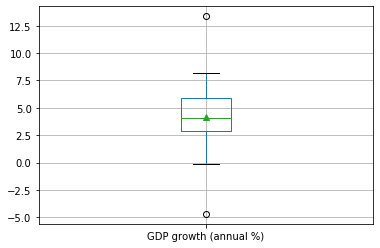

In [11]:
#To compare GDP growth of the countries of sub saharan region
africa_1.boxplot(column = 'GDP growth (annual %)',
                showmeans= True)

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:287: MatplotlibDeprecationWarning: The 'manage_xticks' parameter of boxplot() has been renamed 'manage_ticks' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  bp = ax.boxplot(values, **kwds)


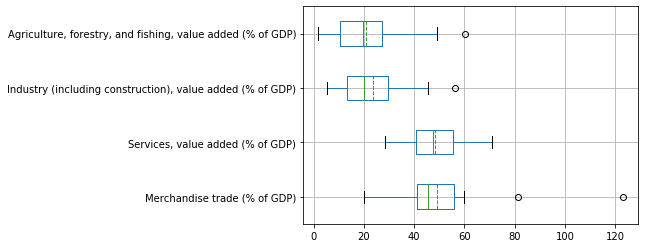

In [12]:
#Looking into three industry to understand the added value to the Countries GDP
#finding that services , trade, and general commerce contribute a lot to the GDP of the SUb saharan Africa

africa_1.boxplot(column        = ['Merchandise trade (% of GDP)','Services, value added (% of GDP)','Industry (including construction), value added (% of GDP)','Agriculture, forestry, and fishing, value added (% of GDP)'],
                 vert          = False,
                 manage_xticks = True, 
                 meanline      = True,
                 showmeans     = True)


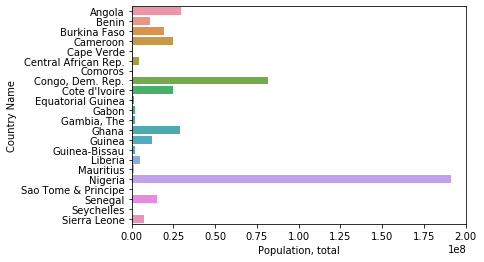

In [13]:
#comparing country population to understand the economical power of the country
#Nigeria is the most populated country followed by DRCongo 
ax = sns.barplot(x="Population, total", y="Country Name",  data=africa_1,)

In [14]:
africa_1.to_excel('excel_2.xlsx')

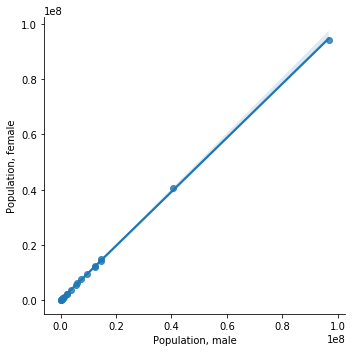

In [15]:
#comparing population of male to female in the region 
sns.lmplot(x='Population, male',y='Population, female',data=africa_1)

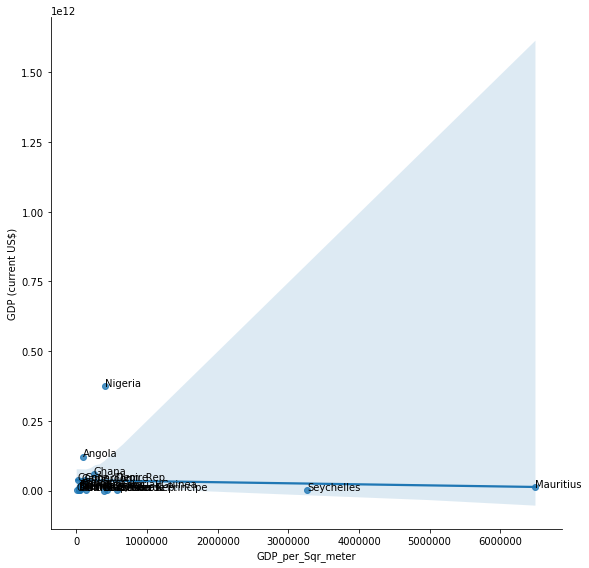

In [16]:
#to determine how well the country is doing when compared to ist size
sns.lmplot(x='GDP_per_Sqr_meter',y='GDP (current US$)',data=africa_1,height=8)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.01, point['y'], str(point['val']))

label_point(africa_1['GDP_per_Sqr_meter'], africa_1['GDP (current US$)'], africa_1['Country Name'], plt.gca())

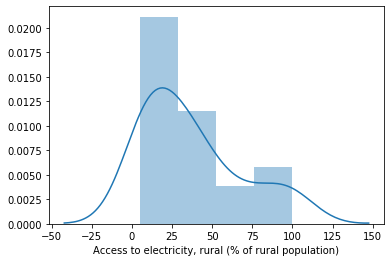

In [17]:
#There is no normal distribution in terms access to electricity for people living in 
#rural erea in the sub saharan Africa
#and which explain part of the problem with underdevelopement 
sns.distplot(africa_1['Access to electricity, rural (% of rural population)'])

<h3>Create plots using "Seaborn"  </h3>

* <strong>A better understanding of urban electricity access compare to rural tell us a story of why the region access to electricity compare from rural compare to urban</strong>

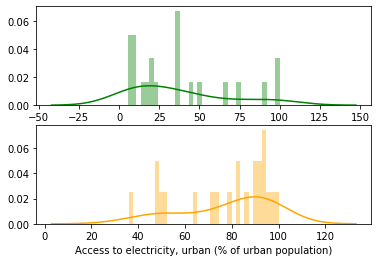

In [18]:
plt.subplot(2, 1, 1)
sns.distplot(africa_1['Access to electricity, rural (% of rural population)'],
             bins = 35,
             color = 'g')


plt.subplot(2, 1, 2)
sns.distplot(africa_1['Access to electricity, urban (% of urban population)'],
             bins = 35,
             color = 'orange')

<h3> Conclusion:</h3>

<strong> 
* The Government of Seychelles, through saving and increasing revenue, we can deduct that Seychelles has a higher % of tax revenue compared to some of the most robust GDP of the region, like Nigeria and Angola.
    
* Everything that is being traded with Seychelles is taxed which lead to visible high tax % revenue.
</strong>




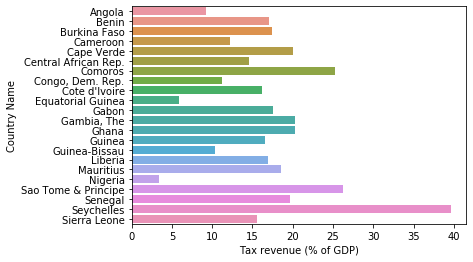

In [19]:
sns.barplot(data=africa_1, x="Tax revenue (% of GDP)",
y="Country Name")